## Feature Engineering 特徵工程

## 特徵工程技術

- 數值特徵處理
- 類別特徵處理
- 時間序列特徵處理
- 文本特徵處理

## 資料偏態
- 左偏態（負偏態）：數據分佈的左側（較小的數值）更長或有更長的尾巴。常見於數值密集在高值區的數據。
- 右偏態（正偏態）：數據分佈的右側（較大的數值）更長或有更長的尾巴。常見於數值密集在低值區的數據。


### 計算偏態
- 使用 skew() 函數計算偏態，值越接近零，數據越對稱。正值表示右偏，負值表示左偏。

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# 生成示例數據
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({'data': data})


# 計算原始數據的偏態
original_skewness_left = skew(df['data'])
print(f'Original Skewness: {original_skewness_left}')


Original Skewness: 2.0526452829685935


## 資料偏態處理
- [box-cox 延伸閱讀](https://hchungw.pixnet.net/blog/post/11414597-%3C%3C%E8%BD%89%E8%BC%89%3E%3E-16.%E6%95%B8%E6%93%9A%E8%AE%8A%E6%8F%9B%E7%9A%84%E8%90%AC%E8%83%BD%E9%91%B0%E5%8C%99%EF%BC%9A)

Original Skewness: 2.0526452829685935
Log Transformation Skewness: 0.49140926471790436
Square Root Transformation Skewness: 0.6920163230320187
Square Transformation Skewness: 6.847884235505702
Box-Cox Transformation Skewness: 0.07467451168008013
Yeo-Johnson Transformation Skewness: 0.07467449129805642


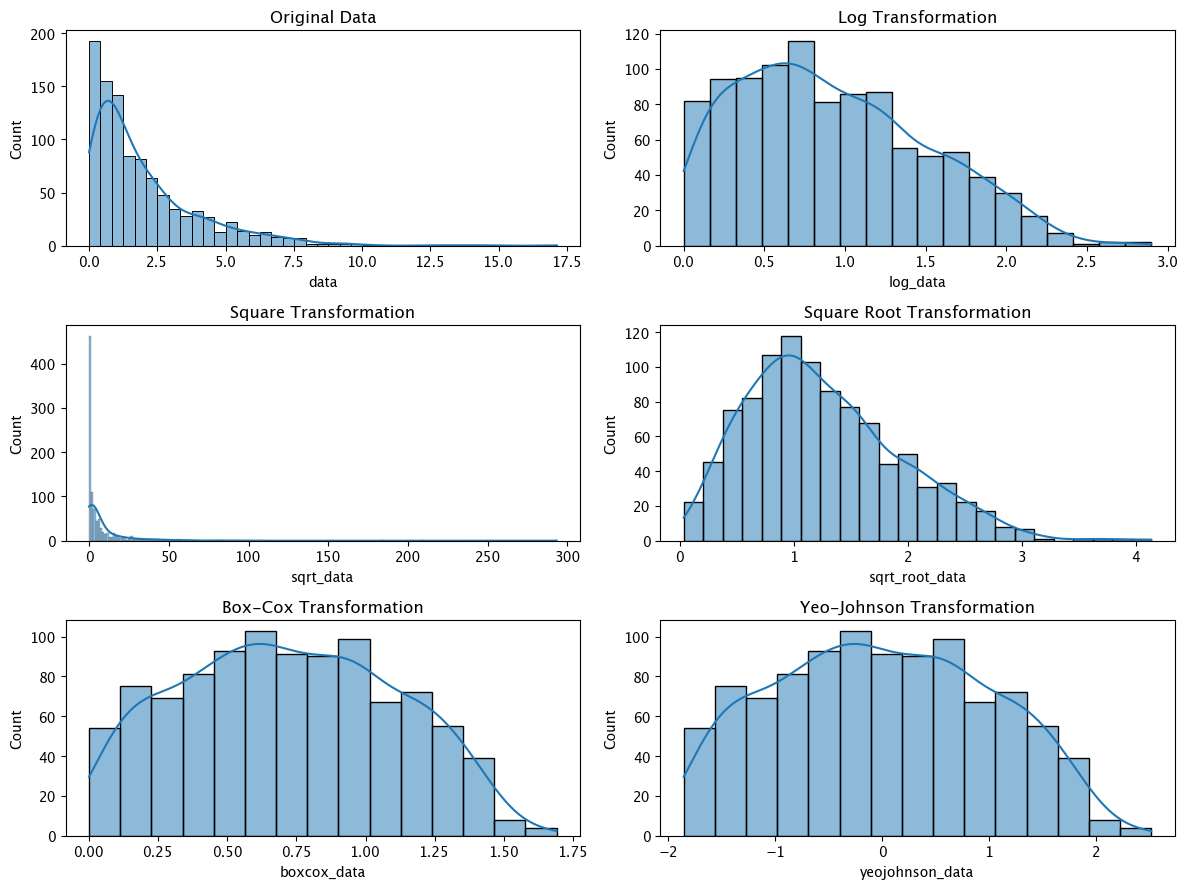

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

# 生成示例數據
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({'data': data})


# 計算原始數據的偏態
original_skewness_left = skew(df['data'])
print(f'Original Skewness: {original_skewness_left}')

# 進行變換

# 對數變換
df['log_data'] = np.log(df['data'] + 1)
log_skewness = skew(df['log_data'])
print(f'Log Transformation Skewness: {log_skewness}')

# 平方根變換
df['sqrt_root_data'] = np.sqrt(df['data'])
sqrt_skewness = skew(df['sqrt_root_data'])
print(f'Square Root Transformation Skewness: {sqrt_skewness}')

# 次方變換
df['sqrt_data'] = df['data'] ** 2
sqrt_skewness = skew(df['sqrt_data'])
print(f'Square Transformation Skewness: {sqrt_skewness}')

# Box-Cox變換
df['boxcox_data'], _ = boxcox(df['data'] + 1)  # Box-Cox不接受零或負值
boxcox_skewness = skew(df['boxcox_data'])
print(f'Box-Cox Transformation Skewness: {boxcox_skewness}')

# Yeo-Johnson變換
pt = PowerTransformer(method='yeo-johnson')
df['yeojohnson_data'] = pt.fit_transform(df[['data']])
yeojohnson_skewness = skew(df['yeojohnson_data'])
print(f'Yeo-Johnson Transformation Skewness: {yeojohnson_skewness}')

# 繪製變換前後的分佈圖
fig, axs = plt.subplots(3, 2, figsize=(12, 9))
sns.histplot(df['data'], kde=True, ax=axs[0, 0]).set_title('Original Data')
sns.histplot(df['log_data'], kde=True, ax=axs[0, 1]).set_title('Log Transformation')
sns.histplot(df['sqrt_data'], kde=True, ax=axs[1, 0]).set_title('Square Transformation')
sns.histplot(df['sqrt_root_data'], kde=True, ax=axs[1, 1]).set_title('Square Root Transformation')
sns.histplot(df['boxcox_data'], kde=True, ax=axs[2, 0]).set_title('Box-Cox Transformation')
sns.histplot(df['yeojohnson_data'], kde=True, ax=axs[2, 1]).set_title('Yeo-Johnson Transformation')

plt.tight_layout()
plt.show()



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

# 生成左偏態數據
np.random.seed(0)
data_left_skewed = np.random.beta(a=5, b=1, size=1000)  # Beta分佈生成左偏態數據
df_left_skewed = pd.DataFrame({'data': data_left_skewed})

# # 計算原始數據的偏態
# original_skewness_left = skew(df_left_skewed['data'])
# print(f'Original Skewness: {original_skewness_left}')

# # 進行變換

# # 對數變換
# df_left_skewed['log_data'] = np.log(df_left_skewed['data'] + 1)
# log_skewness = skew(df_left_skewed['log_data'])
# print(f'Log Transformation Skewness: {log_skewness}')

# 平方根變換
df_left_skewed['sqrt_root_data'] = np.sqrt(df_left_skewed['data'])
# sqrt_skewness = skew(df_left_skewed['sqrt_root_data'])
# print(f'Square Root Transformation Skewness: {sqrt_skewness}')

# # 次方變換
# df_left_skewed['sqrt_data'] = df_left_skewed['data'] ** 2
# sqrt_skewness = skew(df_left_skewed['sqrt_data'])
# print(f'Square Transformation Skewness: {sqrt_skewness}')

# # Box-Cox變換
# df_left_skewed['boxcox_data'], _ = boxcox(df_left_skewed['data'] + 1)  # Box-Cox不接受零或負值
# boxcox_skewness = skew(df_left_skewed['boxcox_data'])
# print(f'Box-Cox Transformation Skewness: {boxcox_skewness}')

# # Yeo-Johnson變換
# pt = PowerTransformer(method='yeo-johnson')
# df_left_skewed['yeojohnson_data'] = pt.fit_transform(df_left_skewed[['data']])
# yeojohnson_skewness = skew(df_left_skewed['yeojohnson_data'])
# print(f'Yeo-Johnson Transformation Skewness: {yeojohnson_skewness}')

# # 繪製變換前後的分佈圖
# fig, axs = plt.subplots(3, 2, figsize=(12, 9))
# sns.histplot(df_left_skewed['data'], kde=True, ax=axs[0, 0]).set_title('Original Data')
# sns.histplot(df_left_skewed['log_data'], kde=True, ax=axs[0, 1]).set_title('Log Transformation')
# sns.histplot(df_left_skewed['sqrt_data'], kde=True, ax=axs[1, 0]).set_title('Square Transformation')
sns.histplot(df_left_skewed['sqrt_root_data'], kde=True, ax=axs[1, 1]).set_title('Square Root Transformation')
# sns.histplot(df_left_skewed['boxcox_data'], kde=True, ax=axs[2, 0]).set_title('Box-Cox Transformation')
# sns.histplot(df_left_skewed['yeojohnson_data'], kde=True, ax=axs[2, 1]).set_title('Yeo-Johnson Transformation')

# plt.tight_layout()
# plt.show()
df_left_skewed

,data,sqrt_root_data
0,0.924279,0.961394
1,0.843267,0.918296
2,0.935677,0.967304
3,0.852415,0.923263
4,0.986193,0.993072
...,...,...
995,0.828981,0.910484
996,0.718400,0.847585
997,0.739508,0.859946
998,0.691872,0.831789


### 離散化

離散化：將數值特徵轉換為離散值。
- 離散化：假設某個數據集中的收入特徵的範圍為 10 萬到 100 萬美元。可以使用離散化將收入特徵轉換為離散值
- [cut 官方文件](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)

<Axes: >

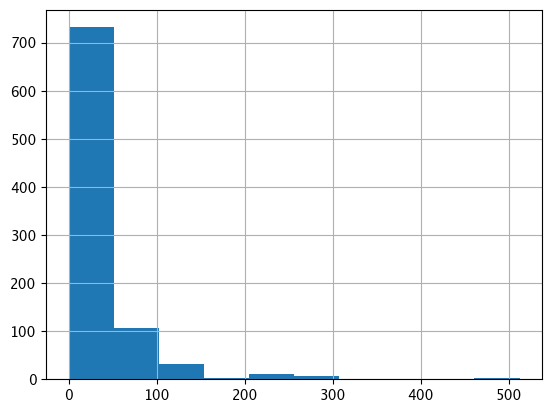

In [11]:
import pandas as pd

# 讀取數據
df = pd.read_csv("dataset/titanic.csv")


# 離散化
bins = [0, 18, 30, 45, 60, 100]
labels = ["0-18", "18-30", "30-45", "45-60", "60-100"]
df["AgeRange"] = pd.cut(df["Age"], bins=bins, labels=labels)

# 查看結果
print(df.head())


## 練習
- 檢查資料裡面的 Fare 數值分佈
1. 請問他是左偏態還是右偏態
2. 檢查過後去使用上面的 root or 次方 來做偏態處理，並且視覺化處理後與處理前的資料

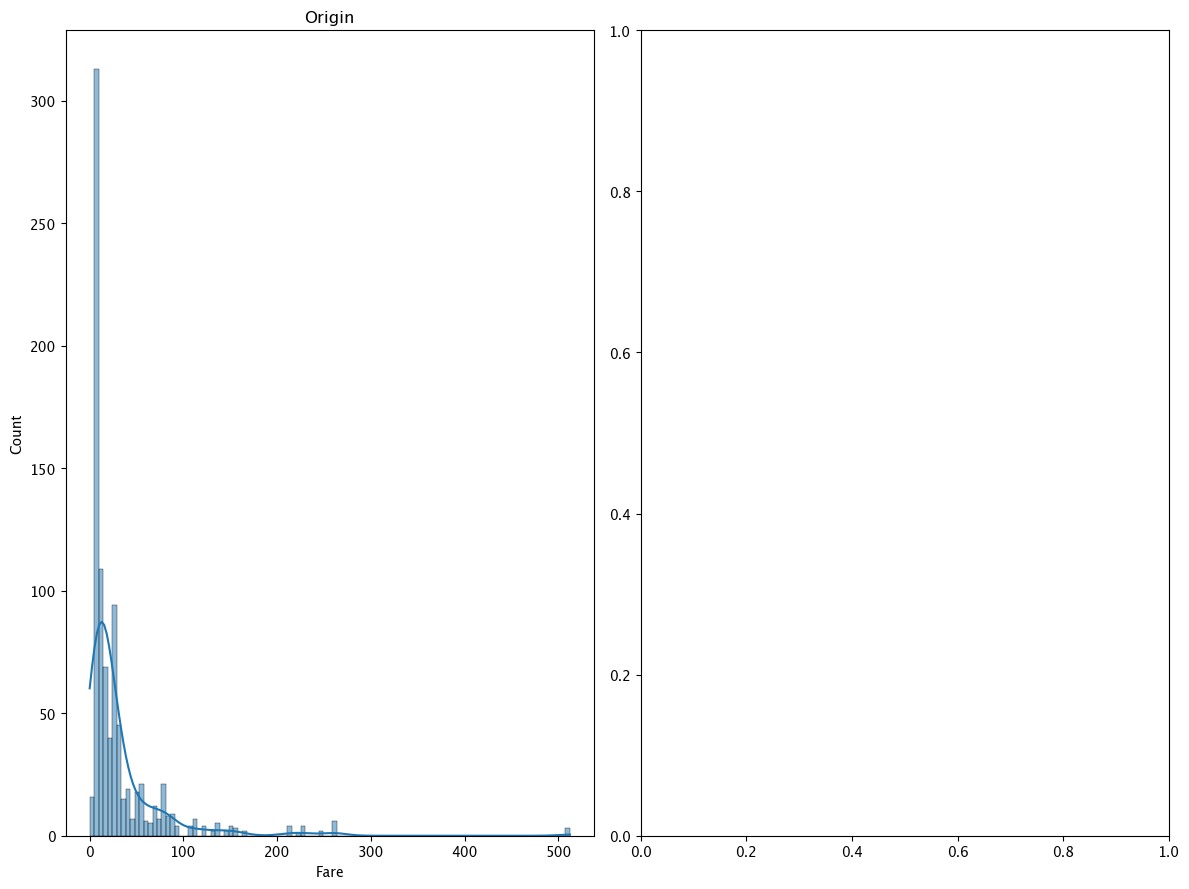

In [13]:
# code at here

df = pd.read_csv("dataset/titanic.csv")

fig, axs = plt.subplots(1, 2, figsize=(12, 9))
sns.histplot(df["Fare"], kde=True, ax=axs[0]).set_title('Origin')
# sns.histplot("處理後的資料", kde=True, ax=axs[1]).set_title('After process')
plt.tight_layout()
plt.show()

## 練習
- 檢查資料裡面的 Fare 數值分佈
1. 檢查過後去使用上面的 box-cox 來做偏態處理，並且視覺化處理後與處理前的資料

In [ ]:
# code at here


fig, axs = plt.subplots(1, 2, figsize=(12, 9))
sns.histplot("處理前的資料", kde=True, ax=axs[0, 0]).set_title('Origin')
sns.histplot("處理後的資料", kde=True, ax=axs[0, 1]).set_title('After process')
plt.tight_layout()
plt.show()

## 回家練習
- 嘗試著使用 Logestic Regression 來去做該資料集的預測，並且將偏態前的預測結果跟偏態後的預測結果做對比撰寫簡單結論
